In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('../data/stocks.csv')

In [3]:
df.info() # shows us that date is a non-null object, not a date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
Date     1257 non-null object
AAPL     1257 non-null float64
GOOGL    1257 non-null float64
FB       1257 non-null float64
MSFT     1257 non-null float64
AMZN     1257 non-null float64
dtypes: float64(5), object(1)
memory usage: 59.0+ KB


In [4]:
df=pd.read_csv('../data/stocks.csv', parse_dates=['Date']) #parse_dates will turn data into dates


In [5]:
df.info()

#three types of way to extract data from
#grouped data extraction - summary statistics during a past pd of time 
#horizontal data extraction - looking at internal attributes of a particular time, day week
#directional data extraction - rolling averages, momentum 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
Date     1257 non-null datetime64[ns]
AAPL     1257 non-null float64
GOOGL    1257 non-null float64
FB       1257 non-null float64
MSFT     1257 non-null float64
AMZN     1257 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 59.0 KB


In [6]:
df.head()

,Date,AAPL,GOOGL,FB,MSFT,AMZN
0,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
1,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
3,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
4,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [7]:
df.shift().head() #shifts everything down 1 row

,Date,AAPL,GOOGL,FB,MSFT,AMZN
0,NaT,NaN,NaN,NaN,NaN,NaN
1,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
3,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
4,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985


In [8]:
df['AAPL']/df['AAPL'].shift() #this shows the day over day changes because everything shifts down a day

df.head()

,Date,AAPL,GOOGL,FB,MSFT,AMZN
0,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
1,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
3,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
4,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [14]:
df.head()

,Date,AAPL,GOOGL,FB,MSFT,AMZN
0,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
1,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
3,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
4,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [18]:
df = df.set_index('Date') #setting date column as index


In [19]:
#now that date is index, we can use dates more flexibily
df/df.shift() #tells day to day shift 

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,0.998530,0.992337,1.005746,1.017551,1.000405
2014-11-07,1.002852,1.000236,1.004518,0.999589,1.010855
2014-11-10,0.998349,1.011616,0.992064,1.004314,1.017508
2014-11-11,1.007994,1.005482,0.994800,0.999591,1.022615
...,...,...,...,...,...
2019-10-28,1.010017,1.019521,1.008037,1.024586,1.008942
2019-10-29,0.976872,0.978029,0.999525,0.990568,0.991914
2019-10-30,0.999877,1.000032,0.994401,1.012462,1.009803


In [20]:
(df/df.shift()).cumprod() #cumulative product across the array

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,0.998530,0.992337,1.005746,1.017551,1.000405
2014-11-07,1.001378,0.992571,1.010290,1.017133,1.011264
2014-11-10,0.999724,1.004101,1.002272,1.021521,1.028969
2014-11-11,1.007716,1.009605,0.997060,1.021103,1.052239
...,...,...,...,...,...
2019-10-28,2.287801,2.318518,2.531070,3.012745,5.993120
2019-10-29,2.234889,2.267578,2.529868,2.984329,5.944658
2019-10-30,2.234613,2.267650,2.515702,3.021521,6.002934


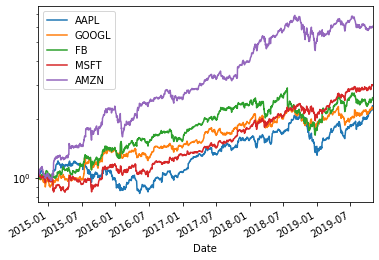

In [24]:
%matplotlib inline #if graph isn't showing
(df/df.shift()).cumprod().plot(logy=True);

#adding a semi-colon will get rid of the extraneous text in the ouput, but is not necessary

In [25]:
df.shift(2) #moves value down two rows, but shift does not account for missing dates 

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,NaN,NaN,NaN,NaN,NaN
2014-11-07,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-10,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-11,109.010002,551.820007,75.599998,48.680000,299.859985
...,...,...,...,...,...
2019-10-28,243.580002,1259.109985,186.380005,139.940002,1780.780029
2019-10-29,246.580002,1264.300049,187.889999,140.729996,1761.329956
2019-10-30,249.050003,1288.979980,189.399994,144.190002,1777.079956


In [27]:
from pandas.tseries.offsets import DateOffset

In [29]:
offset=DateOffset(weeks=1)

In [32]:
df.index - offset #all of these dates are the same, just one week past, so you can compare WoW

DatetimeIndex(['2014-10-29', '2014-10-30', '2014-10-31', '2014-11-03',
               '2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07',
               '2014-11-10', '2014-11-11',
               ...
               '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
               '2019-10-18', '2019-10-21', '2019-10-22', '2019-10-23',
               '2019-10-24', '2019-10-25'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [34]:
df

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010
...,...,...,...,...,...
2019-10-28,249.050003,1288.979980,189.399994,144.190002,1777.079956
2019-10-29,243.289993,1260.660034,189.309998,142.830002,1762.709961
2019-10-30,243.259995,1260.699951,188.250000,144.610001,1779.989990


In [40]:
df.shift(freq=-offset) #observations are from 1 week ago (11/12 is from 11/5)

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-10-29,108.860001,555.950012,74.830002,47.860001,296.519989
2014-10-30,108.699997,551.690002,75.260002,48.700001,296.640015
2014-10-31,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-03,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-04,109.699997,561.289978,74.610001,48.869999,312.010010
...,...,...,...,...,...
2019-10-21,249.050003,1288.979980,189.399994,144.190002,1777.079956
2019-10-22,243.289993,1260.660034,189.309998,142.830002,1762.709961
2019-10-23,243.259995,1260.699951,188.250000,144.610001,1779.989990


In [41]:
df

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010
...,...,...,...,...,...
2019-10-28,249.050003,1288.979980,189.399994,144.190002,1777.079956
2019-10-29,243.289993,1260.660034,189.309998,142.830002,1762.709961
2019-10-30,243.259995,1260.699951,188.250000,144.610001,1779.989990


In [42]:
df.pct_change() #%change frm previous data insert

,AAPL,GOOGL,FB,MSFT,AMZN
Date,,,,,
2014-11-05,NaN,NaN,NaN,NaN,NaN
2014-11-06,-0.001470,-0.007663,0.005746,0.017551,0.000405
2014-11-07,0.002852,0.000236,0.004518,-0.000411,0.010855
2014-11-10,-0.001651,0.011616,-0.007936,0.004314,0.017508
2014-11-11,0.007994,0.005482,-0.005200,-0.000409,0.022615
...,...,...,...,...,...
2019-10-28,0.010017,0.019521,0.008037,0.024586,0.008942
2019-10-29,-0.023128,-0.021971,-0.000475,-0.009432,-0.008086
2019-10-30,-0.000123,0.000032,-0.005599,0.012462,0.009803


In [46]:
df['AAPL'].diff() #diff measures actual difference in value measured today vs the one measured yesterday (1 day change)

Date
2014-11-05         NaN
2014-11-06   -0.160004
2014-11-07    0.310005
2014-11-10   -0.180000
2014-11-11    0.869995
                ...   
2019-10-28    2.470001
2019-10-29   -5.760010
2019-10-30   -0.029998
2019-10-31    5.500000
2019-11-01    7.060012
Name: AAPL, Length: 1257, dtype: float64

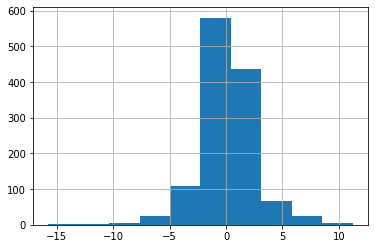

In [48]:
df['AAPL'].diff().hist(); #diff measures actual difference in value measured today vs the one measured yesterday (1 day change)

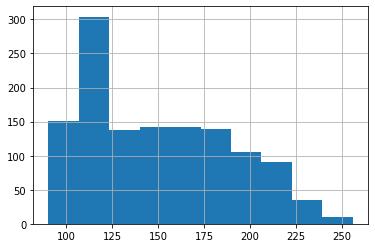

In [50]:
df['AAPL'].hist(); #just makes daily info into hist

In [55]:
#Window statistics, rolling averages, directional data 
df['AAPL'].rolling(5).mean() #rolling averages every 5 time periods (in this case, days)
#5th cell is the avergae of that day + the 4 days before it, etc etc. 

Date
2014-11-05           NaN
2014-11-06           NaN
2014-11-07           NaN
2014-11-10           NaN
2014-11-11    109.020000
                 ...    
2019-10-28    244.470001
2019-10-29    245.135999
2019-10-30    245.151999
2019-10-31    246.187998
2019-11-01    248.035999
Name: AAPL, Length: 1257, dtype: float64

In [ ]:
df[]